In [1]:
# %pip install phrasetopicminer --force-reinstall

In [2]:
import sys
import phrasetopicminer as ptm

print("Python:", sys.version)
print("Executable:", sys.executable)
print("PTM version:", ptm.__version__)
print("PTM module file:", ptm.__file__)
print("Available top-level names:", [n for n in dir(ptm) if not n.startswith("_")])


/Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Python: 3.12.7 (main, Nov 30 2025, 22:18:21) [Clang 16.0.0 (clang-1600.0.26.3)]
Executable: /Users/ahmadhashemi/tmp_nlp312/.venv/bin/python
PTM version: 0.1.1
PTM module file: /Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/phrasetopicminer/__init__.py
Available top-level names: ['ClusterLabelingInput', 'ClusterLabelingResult', 'LabeledTopicCluster', 'PackageNotFoundError', 'PhraseMiner', 'PhraseRecord', 'TopicCluster', 'TopicCoreResult', 'TopicLabelModel', 'TopicLabeler', 'TopicLabelingResult', 'TopicModeler', 'TopicTimelineBuilder', 'TopicTimelineResult', 'build_phrase_sentence_examples_from_occurrences', 'make_datamapplot_interactive', 'make_datamapplot_static', 'phrase_miner', 'plot_phrase_bubble_map', 'plot_phrase_treemap', 'plot_topic_timeline', 'topic_labeler', 'topic_modeler', 'topic_timeline', 'topic_viz', 'version', 'visualization_datamap']


In [3]:
text = """
1. Aspects of the mind
Thought is when we absorb what happens around us so that we can deal with it effectively according to our plans and desires. Thinking is using information, like forming concepts, problem solving, reasoning and making choices.

Memory is when we store information in our minds, and can later recall it.

Imagination is the **ability to invent worlds inside the mind**, complete or not. The mind makes these by *drawing on experience in the shared world*.

Consciousness is knowing that we exist and the world exists, and being able to understand what happens around us.

2. Mental health
Just like the body, a mind can be healthy. The measure of this is called mental health. According to the World Health Organization (WHO), there is not one way to measure mental health in all people, because there are many things in our environment that might make what is mentally healthy different from one person to another. In general, most experts agree that "mental health" and "mental illness" are not opposites. In other words, not having a mental illness does not mean you are in good mental health.
"""

text1 = """
One way to study mental health is by looking at how well a person lives. Signs of mental health include: feeling capable and happy, being able to handle normal levels of stress, making and keeping friends, leading an independent life, and being able to recover from difficult situations.
"""

text2 = """
Philosophy
Philosophy of mind is the branch of philosophy that studies the nature of the mind and how it is linked to the body. The main problem is how the mind is related to the body, but there are also questions about the nature of the mind that do not talk about its relation to the physical body.[4]

Dualism and monism are the two main ways people try to solve the mind-body problem. Dualism is when people believe that the mind and body are in some way separate from each other. It can be traced back to Plato,[5] Aristotle,[6][7][8] and the Samkhya and Yoga schools of Hindu philosophy,[9] but it was most precisely formulated by René Descartes in the 17th century.[10]

Monism is the belief that mind and body are not physiologically and ontologically distinct kinds of entities. This view was first seen in Western philosophy by Parmenides in the 5th century BC and was later held by the 17th-century rationalist Baruch Spinoza.[11] According to Spinoza, mind and body are two parts of a larger being.
"""

text3 = """
Idealists think that the mind is all that exists and that the outside world is actually made up by the mind. Physicalists think that everything can be expressed by what is physical. Neutral monists believe that everything can be either mental or physical depending how you see it. For example, a red spot on a wall is physical, because it is an actual thing depending on the physical wall, but it is mental because our brain responds to the colour. The most common monisms in the 20th and 21st centuries have all been different kinds of physicalism, including behaviorism.[1][2][4]

Psychology
Psychology is the study of the way we think, feel and act. It involves the scientific study of processes such as perception, cognition, feelings, personality, as well as things around us that might affect the way we think. From this study, psychologists try to form rules for why we act the way we do. Psychology also includes using this knowledge to help solve problems of everyday life and treat mental health problems.

Social psychology and group behaviour
Social psychology is the study of how we think, feel and act in groups of other people. Most people who study social psychology are either psychologists or sociologists.
"""

texts = [text, text1, text2, text3]


## `PhraseMiner`

In [4]:
%%time
# 1) Phrase mining
miner = ptm.PhraseMiner(
    method="spacy",
    spacy_model="en_core_web_lg",
    include_verb_phrases=True,
    clean_markdown=True,
)

/Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/spacy/util.py:969: UserWarning: [W095] Model 'en_core_web_lg' (3.7.1) was trained with spaCy v3.7.2 and may not be 100% compatible with the current version (3.8.11). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


CPU times: user 1.69 s, sys: 374 ms, total: 2.06 s
Wall time: 2.42 s


In [5]:
%%time
np_counter, vp_counters, phrase_records, sentences_by_doc = miner.mine_phrases_with_types(texts)

print("Total NP phrases:", len(np_counter))
print("Total VP phrases:", len(vp_counters))
print("Number of phrase records:", len(phrase_records))
print("Docs / sentences:", [len(sents) for sents in sentences_by_doc])

Total NP phrases: 89
Total VP phrases: 4
Number of phrase records: 202
Docs / sentences: [11, 2, 8, 11]
CPU times: user 506 ms, sys: 9.37 ms, total: 516 ms
Wall time: 524 ms


## `TopicModeler`

In [6]:
%%time
# 2) Topic modeling (core clustering API)
modeler = ptm.TopicModeler(
    embedding_backend="sentence_transformers",   # or "spacy", "openai", "cohere", "custom"
    embedding_model="all-MiniLM-L6-v2",
    embedding_fn=None,    # only if embedding_backend="custom"
    spacy_nlp=None,       # only if embedding_backend="spacy"
    random_state=42,
)


CPU times: user 4 μs, sys: 1 μs, total: 5 μs
Wall time: 6.2 μs


In [7]:
%%time
core = modeler.fit_core(
    # --- required core inputs ---
    phrase_records=phrase_records,
    sentences_by_doc=sentences_by_doc,

    # --- phrase filtering options ---
    include_kinds={"NP", "VP"},          # only NP; use {"NP", "VP"} to include both
    include_patterns={"BaseNP", "NP+PP", "NP+multiPP", 
                      "VerbObj", "VerbPP", "SubjVerb"
                      },  # or e.g. {"BaseNP", "NP+PP"}
    min_freq_unigram=3,            # threshold for 1-word phrases
    min_freq_bigram=1,             # threshold for 2-word phrases
    min_freq_trigram_plus=1,       # threshold for >=3-word phrases

    # --- geometric pipeline options ---
    pca_n_components=10,           # 0 or None if you want to skip PCA
    cluster_geometry="umap_2d",    # "umap_nd" or "umap_2d"
    umap_n_neighbors=5,
    umap_min_dist=0.1,
    umap_cluster_n_components=10,  # target dim for clustering (if using umap_nd)

    # --- clustering options ---
    clustering_algorithm="hdbscan",   # "hdbscan" or "kmeans"
    hdbscan_min_cluster_size=5,
    hdbscan_min_samples=None,
    hdbscan_metric="euclidean",
    kmeans_max_clusters=15,          # used only if clustering_algorithm="kmeans"

    # --- visualization geometry ---
    viz_reducer="tsne_2d",           # "same", "umap_2d", or "tsne_2d"
    tsne_perplexity=30.0,
    tsne_learning_rate=200.0,
    tsne_n_iter=1000,

    # --- cluster representatives ---
    top_n_representatives=10,

    verbose=True,
)


[TopicModeler] Step 1/12 – filtering PhraseRecords by kind/pattern...
[TopicModeler]   → kept 183 occurrences after filtering.
[TopicModeler] Step 2/12 – built occurrence map for 153 phrases (freq source: reconstructed_from_records).
[TopicModeler] Step 3/12 – phrase DataFrame has 153 rows before n-gram filtering.
[TopicModeler] Step 4/12 – 106 phrases remain after n-gram thresholds.
[TopicModeler] Step 5/12 – phrase_sentences built for 106 phrases.
[TopicModeler] Step 6/12 – embedding 106 phrases...


Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 12.99it/s]


[TopicModeler]   → embeddings computed with backend='sentence_transformers'.
[TopicModeler] Step 7/12 – PCA denoising to 10 dims.


/Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


[TopicModeler] Step 8/12 – UMAP geometry (umap_2d).
[TopicModeler] Step 9/12 – clustering with 'hdbscan'.


/Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ahmadhashemi/tmp_nlp312/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[TopicModeler] Step 10/12 – computing 2D viz embedding via 'tsne_2d'.
[TopicModeler] Step 11/12 – aggregating TopicCluster objects.
[TopicModeler] Step 12/12 – assembling TopicCoreResult.
CPU times: user 10 s, sys: 4.81 s, total: 14.8 s
Wall time: 12.1 s


In [8]:
print(f" --- config ---\n{core.config}")

 --- config ---
{'embedding_backend': 'sentence_transformers', 'embedding_model_name': 'all-MiniLM-L6-v2', 'pca_n_components': 10, 'cluster_geometry': 'umap_2d', 'umap_n_neighbors': 5, 'umap_min_dist': 0.1, 'umap_cluster_n_components': 10, 'clustering_algorithm': 'hdbscan', 'hdbscan_min_cluster_size': 5, 'hdbscan_min_samples': None, 'hdbscan_metric': 'euclidean', 'kmeans_max_clusters': 15, 'viz_reducer': 'tsne_2d', 'tsne_perplexity': 30.0, 'tsne_learning_rate': 200.0, 'tsne_n_iter': 1000, 'min_freq_unigram': 3, 'min_freq_bigram': 1, 'min_freq_trigram_plus': 1, 'include_kinds': {'NP', 'VP'}, 'include_patterns': ['BaseNP', 'NP+PP', 'NP+multiPP', 'SubjVerb', 'VerbObj', 'VerbPP'], 'random_state': 42, 'num_documents': 4, 'num_sentences_total': 32, 'phrase_frequency_source': 'reconstructed_from_records'}


In [9]:
phrases_df = core.phrases_df
phrases_df.head()

phrase  count  n_tokens  \
0           mind      8         1   
1           body      6         1   
2  mental health      4         2   
3            way      3         1   
4     psychology      3         1   

                                           embedding  cluster_id         x  \
0  [-0.015387005, -0.064021975, -0.013121371, -0....           3  5.419042   
1  [-0.039656777, 0.05032509, 0.0005433311, 0.037...           4 -5.291442   
2  [0.04313957, 0.061165, -0.04216078, 0.04957711...           2 -1.958633   
3  [-0.054202598, 0.010288413, -0.015704304, -0.0...           4 -2.569158   
4  [0.04209405, 0.055608828, -0.028822178, 0.1035...           4  3.202238   

           y  
0  -0.567245  
1  -0.120916  
2  11.001884  
3  -3.151147  
4   3.904191

In [60]:
clusters = core.clusters
clusters[0]

TopicCluster(cluster_id=4, phrases=['body', 'way', 'psychology', 'social psychology', 'one way', 'people believe', 'believe that everything', 'red spot on a wall', 'actual thing', 'outside world', 'are two parts', 'two parts of a larger being', 'physical wall', 'distinct kinds of entities', 'form rules', 'psychologists try', 'group behaviour', 'groups of other people', 'act in groups', 'most people', 'scientific study of processes', 'study of the way', 'centuries have', 'including behaviorism', 'been different kinds', '21st centuries', 'are in some way', 'responds to the colour', 'depending on the physical wall', 'thing depending', 'two main ways people', 'world exists', 'shared world', 'drawing on experience', 'many things', 'invent worlds', 'using information', 'forming concepts', 'making choices', 'store information', 'one person', 'are many things', 'linked to the body', 'keeping friends', 'relation to the physical body', 'related to the body', 'body problem', 'people try', 'most e

In [11]:
phrase_occurrences = core.phrase_occurrences
phrase_occurrences

{'aspects of the mind': [PhraseRecord(phrase='aspects of the mind', surface='Aspects of the mind', kind='NP', pattern='NP+PP', doc_index=0, sent_index=0)],
 'problem solving': [PhraseRecord(phrase='problem solving', surface='problem solving', kind='NP', pattern='BaseNP', doc_index=0, sent_index=1)],
 'using information': [PhraseRecord(phrase='using information', surface='using information', kind='VP', pattern='VerbObj', doc_index=0, sent_index=1)],
 'forming concepts': [PhraseRecord(phrase='forming concepts', surface='forming concepts', kind='VP', pattern='VerbObj', doc_index=0, sent_index=1)],
 'making choices': [PhraseRecord(phrase='making choices', surface='making choices', kind='VP', pattern='VerbObj', doc_index=0, sent_index=1)],
 'thinking is using': [PhraseRecord(phrase='thinking is using', surface='Thinking is using', kind='VP', pattern='SubjVerb', doc_index=0, sent_index=1)],
 'store information': [PhraseRecord(phrase='store information', surface='store information', kind='VP'

In [12]:
phrase_sentences = core.phrase_sentences
phrase_sentences

{'aspects of the mind': ['Aspects of the mind\nThought is when we absorb what happens around us so that we can deal with it effectively according to our plans and desires.'],
 'problem solving': ['Thinking is using information, like forming concepts, problem solving, reasoning and making choices.'],
 'using information': ['Thinking is using information, like forming concepts, problem solving, reasoning and making choices.'],
 'forming concepts': ['Thinking is using information, like forming concepts, problem solving, reasoning and making choices.'],
 'making choices': ['Thinking is using information, like forming concepts, problem solving, reasoning and making choices.'],
 'thinking is using': ['Thinking is using information, like forming concepts, problem solving, reasoning and making choices.'],
 'store information': ['Memory is when we store information in our minds, and can later recall it.'],
 'worlds inside the mind': ['Imagination is the \nability to invent worlds inside the min

## `TopicTimelineBuilder`

In [13]:
%%time
# 3Build timeline
timeline_builder = ptm.TopicTimelineBuilder(
    timeline_mode="reading_time",
    speech_rate_wpm=200,
    log_fn=print,  # or st.markdown, rich console logger, etc.
)

CPU times: user 21 μs, sys: 91 μs, total: 112 μs
Wall time: 143 μs


In [14]:
%%time
timeline = timeline_builder.build(core_result=core,
                                  sentences_by_doc=sentences_by_doc)

▶ Building sentence-level timeline…
▶ Linking phrases to sentences…
▶ Aggregating sentences per cluster…
✅ TopicTimelineBuilder finished.
CPU times: user 13 ms, sys: 11 ms, total: 24 ms
Wall time: 23.3 ms


In [15]:
cluster_sentence_df = timeline.cluster_sentence_df
cluster_sentence_df

cluster_id                                   sentence_indices  \
0           0                   [(0, 1), (1, 1), (2, 1), (3, 8)]   
1           1  [(2, 0), (2, 4), (2, 6), (2, 7), (3, 0), (3, 1...   
2           2  [(0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (1, ...   
3           3  [(0, 0), (0, 1), (0, 3), (0, 4), (0, 5), (0, 6...   
4           4  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6...   

                              sentence_start_ms_list  \
0               [8100.0, 61500.0, 78600.0, 170400.0]   
1  [71400.0, 98700.0, 112800.0, 120300.0, 124200....   
2  [30000.0, 33300.0, 35700.0, 47700.0, 51900.0, ...   
3  [0.0, 8100.0, 16200.0, 20400.0, 24300.0, 30000...   
4  [8100.0, 12000.0, 16200.0, 20400.0, 24300.0, 3...   

                             sentence_start_min_list  \
0                         [0.135, 1.025, 1.31, 2.84]   
1  [1.19, 1.645, 1.88, 2.005, 2.07, 2.175, 2.23, ...   
2  [0.5, 0.555, 0.595, 0.795, 0.865, 0.95, 1.025,...   
3  [0.0, 0.135, 0.27, 0.34, 0.405, 0.5, 1.19, 1.3...   
4  [0.135, 0.2, 0.27, 0.34, 0.405, 0.5, 0.595, 0....   

                                  sentence_text_list  num_sentences  
0  [Thinking is using information, like forming c...              4  
1  [Philosophy\nPhilosophy of mind is the branch ...              8  
2  [Mental health\nJust like the body, a mind can...              8  
3  [Aspects of the mind\nThought is when we absor...             15  
4  [Thinking is using information, like forming c...             27

In [16]:
phrase_sentence_df = timeline.phrase_sentence_df
print(f"phrase_sentence_df shape: {phrase_sentence_df.shape}\n","---"*10)
phrase_sentence_df.head(3)

phrase_sentence_df shape: (129, 13)
 ------------------------------


phrase  cluster_id  global_count  occurrence_index  doc_index  \
0  aspects of the mind           3             1                 0          0   
1      problem solving           0             1                 0          0   
2    using information           4             1                 0          0   

   sent_index                                      sentence_text  \
0           0  Aspects of the mind\nThought is when we absorb...   
1           1  Thinking is using information, like forming co...   
2           1  Thinking is using information, like forming co...   

   sentence_start_ms  sentence_start_min  sentence_duration_ms  timeline_idx  \
0                0.0               0.000                8100.0             0   
1             8100.0               0.135                3900.0             1   
2             8100.0               0.135                3900.0             1   

  kind  pattern  
0   NP    NP+PP  
1   NP   BaseNP  
2   VP  VerbObj

In [17]:
sentence_df = timeline.sentence_df
print(f"sentence_df shape: {sentence_df.shape}\n","---"*10)
sentence_df.head(3)

sentence_df shape: (32, 9)
 ------------------------------


doc_index  sent_index                                      sentence_text  \
0          0           0  Aspects of the mind\nThought is when we absorb...   
1          0           1  Thinking is using information, like forming co...   
2          0           2  Memory is when we store information in our min...   

   word_count  timeline_idx  start_ms   end_ms  duration_ms  start_min  
0          27             0       0.0   8100.0       8100.0      0.000  
1          13             1    8100.0  12000.0       3900.0      0.135  
2          14             2   12000.0  16200.0       4200.0      0.200

In [18]:
timeline.config

{'timeline_mode': 'reading_time',
 'speech_rate_wpm': 200.0,
 'reset_time_per_document': False}

## `topic_viz`

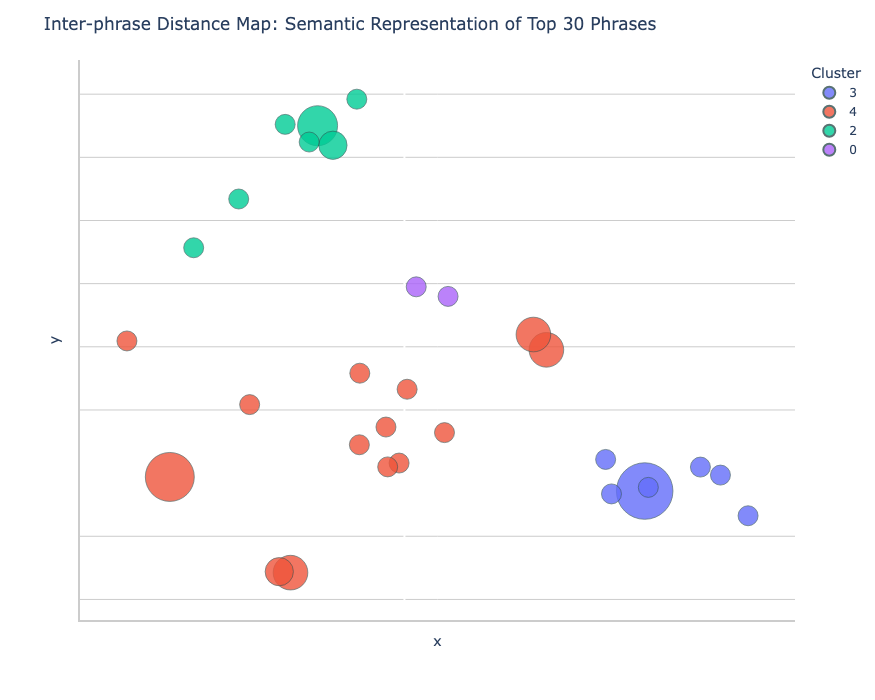

In [19]:
ptm.plot_phrase_bubble_map(core, max_phrases=30, show_text=False)

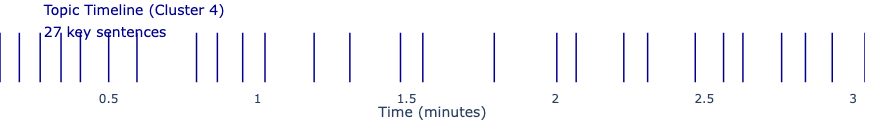

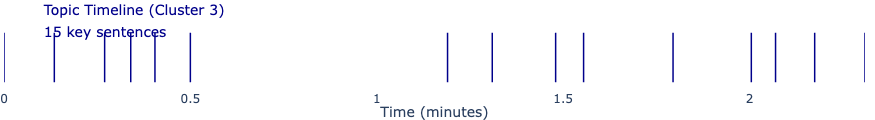

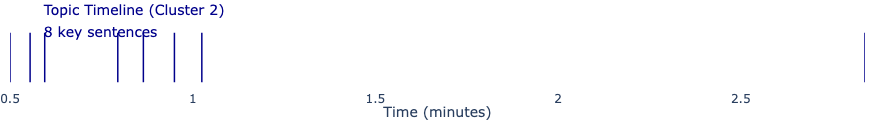

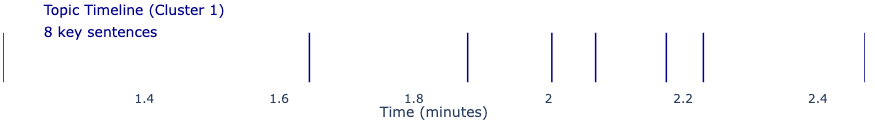

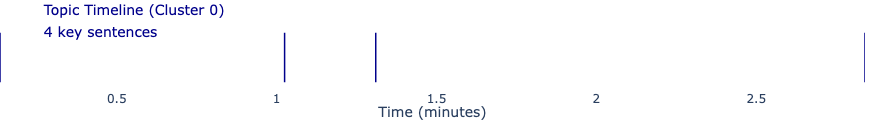

In [20]:
for i in range(len(core.clusters)):
    cluster_to_show = core.clusters[i].cluster_id
    ptm.plot_topic_timeline(timeline, cluster_id=cluster_to_show, time_unit="min").show()

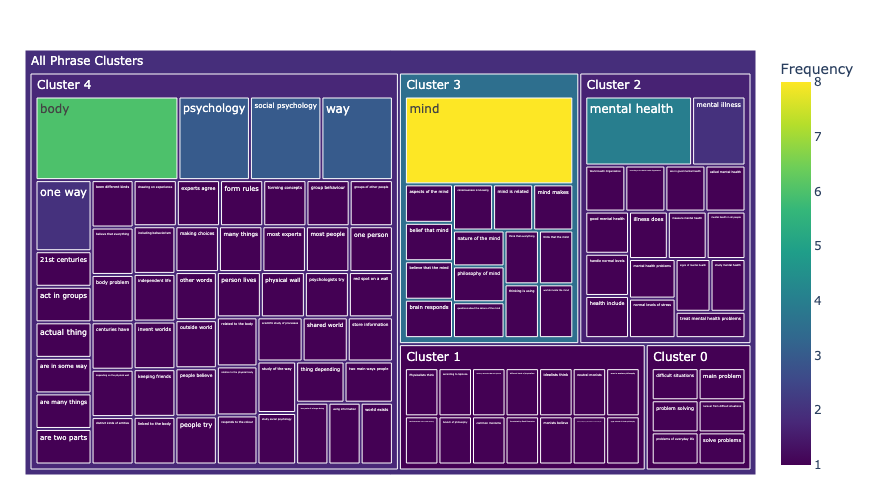

In [21]:
treemap_fig = ptm.plot_phrase_treemap(core_result=core)
treemap_fig.show()

## `visualization_datamap`

In [22]:
# Build phrase → sentence examples
phrase_sentence_examples = ptm.build_phrase_sentence_examples_from_occurrences(
    core,
    sentences_by_doc,
    max_sentences_per_phrase=3,
    min_sentence_chars=30,
)

Calculating medoids: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.15it/s]


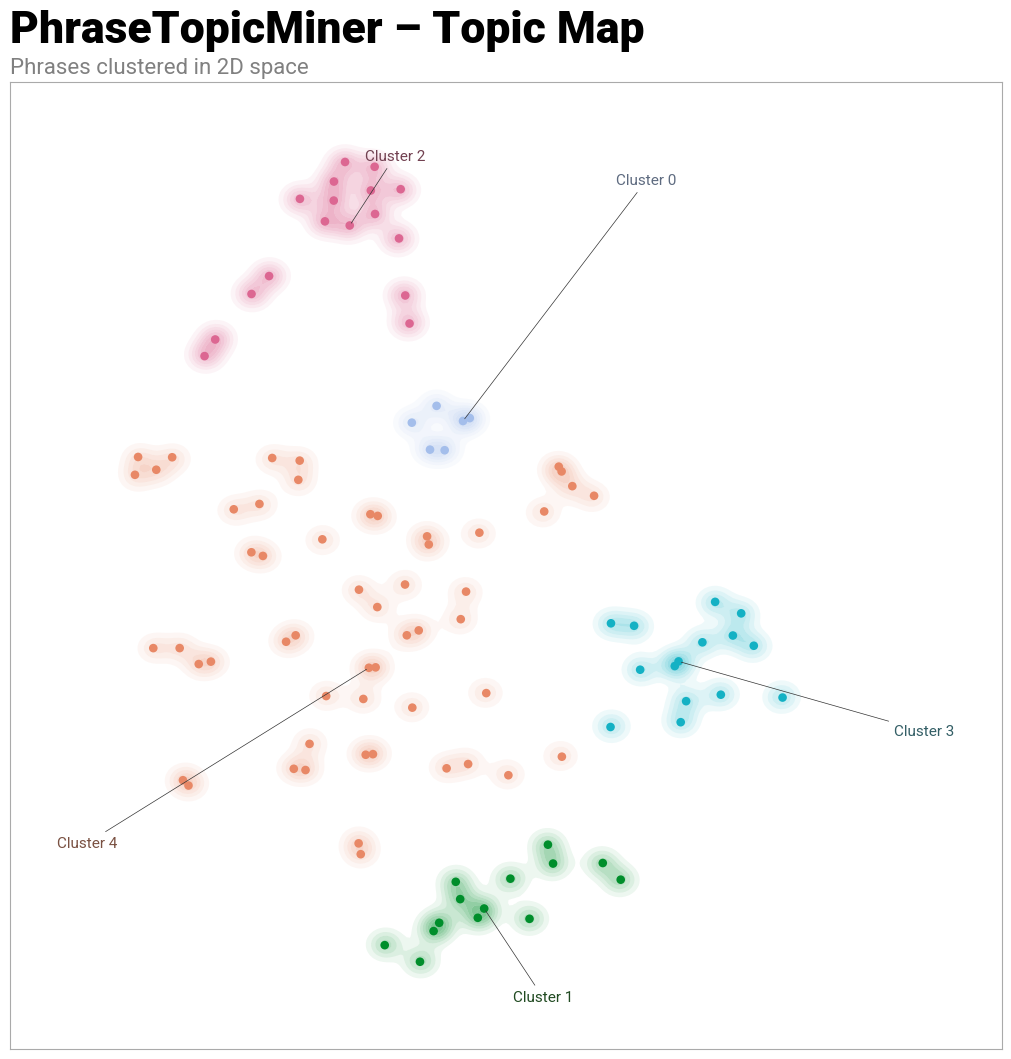

In [23]:
# Static PNG:
fig_static, ax = ptm.make_datamapplot_static(
    core,
    cluster_name_map=None,
    save_path="topic_map.png",
    label_font_size=11,
    use_medoids=True,
)

<InteractiveFigure width=100% height=800>
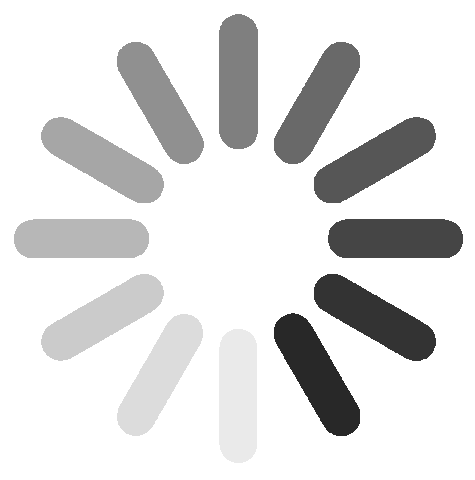

In [24]:
# Interactive topic map with highlighted sentences in the hover
fig_int = ptm.make_datamapplot_interactive(
    core,
    sentences_by_doc=sentences_by_doc,
    cluster_name_map=None,
    point_size=5,  
    save_html_path="phrase_topics.html",
)

# In Jupyter: `display(fig_int)`
display(fig_int)

## `TopicLabeler`

In [25]:
import warnings
warnings.filterwarnings('ignore')

from dotenv import load_dotenv
load_dotenv(override=True)

True

In [26]:
from agents import Agent

topic_agent = Agent(
    name="PhraseTopicLabeler",
    instructions=(
        "You are a topic labeling assistant. "
        "Given key phrases and example sentences for a single topic, "
        "you must respond ONLY with JSON containing 'title' and "
        "'description'."
    ),
    model='gpt-4o-mini'
)

labeler = ptm.TopicLabeler(
    topic_agent,
    max_phrases_per_cluster=25,
    max_sentences_per_cluster=40,
    include_noise=False,
)


In [27]:
# Cell is allowed to use `await` in Jupyter
labeling_result = await labeler.label_topics_async(core, sentences_by_doc)

Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.


[TopicLabeler] Found cluster_ids in core_result: [0, 1, 2, 3, 4]
[TopicLabeler] Labeling 5 cluster(s): [0, 1, 2, 3, 4]
[TopicLabeler] Prepared cluster inputs (phrases + sentences) for 5 cluster(s).
[TopicLabeler] Calling agent for cluster 0...
[TopicLabeler] Calling agent for cluster 1...
[TopicLabeler] Calling agent for cluster 2...
[TopicLabeler] Calling agent for cluster 3...
[TopicLabeler] Calling agent for cluster 4...
[TopicLabeler] Agent output for cluster 0: {
  "title": "Everyday Problem Solving",
  "description": "This topic focuses on the challenges individuals face in dail...
[TopicLabeler] Agent output for cluster 4: {
  "title": "Mind-Body Connection in Psychology",
  "description": "This topic explores the intricate relationship betw...
[TopicLabeler] Agent output for cluster 2: {
  "title": "Understanding Mental Health",
  "description": "This topic explores the concept of mental health, emphasiz...
[TopicLabeler] Agent output for cluster 1: {
  "title": "Philosophy of 

In [28]:
cluster_name_map = labeling_result.cluster_name_map

In [29]:
cluster_name_map

{0: 'Everyday Problem Solving',
 1: 'Philosophy of Mind and Monism',
 2: 'Understanding Mental Health',
 3: 'Exploring the Nature of Mind',
 4: 'Mind-Body Connection in Psychology'}

Calculating medoids: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 540.31it/s]


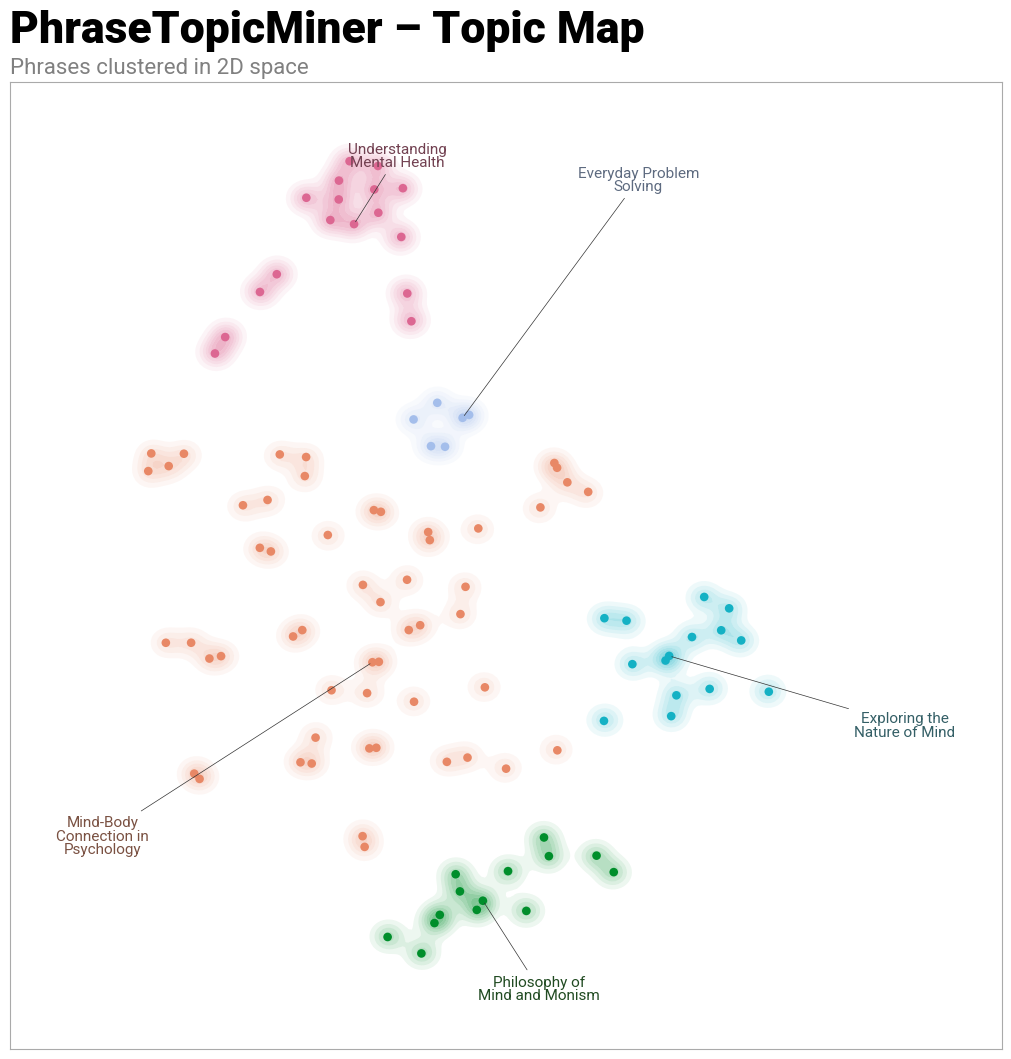

In [30]:
# Static PNG:
fig, ax = ptm.make_datamapplot_static(
    core,
    cluster_name_map=cluster_name_map,
    save_path="topic_map.png",
    label_font_size=11,
    use_medoids=True,
)


<InteractiveFigure width=100% height=800>
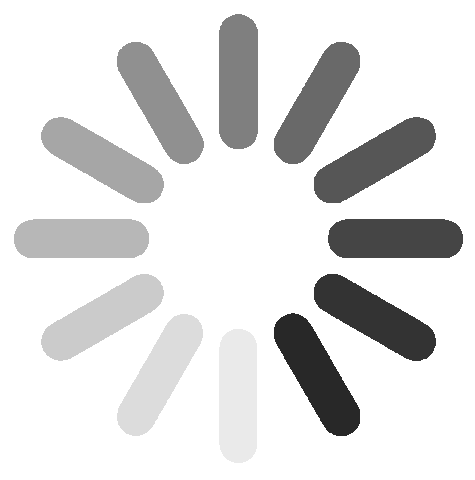

In [31]:
# Interactive topic map with highlighted sentences in the hover
fig_int = ptm.make_datamapplot_interactive(
    core,
    sentences_by_doc=sentences_by_doc,
    cluster_name_map=cluster_name_map,
    point_size=5,  
    save_html_path="phrase_topics.html",
)

# In Jupyter: `display(fig_int)`
display(fig_int)

In [32]:
import json
import asyncio
from typing import Any, Dict, List, Optional, Tuple
from dataclasses import dataclass, field
from pydantic import BaseModel, Field
from langchain_core.language_models import BaseLanguageModel
from langchain_core.messages import HumanMessage


class TopicLabelModel(BaseModel):
    """Structured label for a single topic / cluster."""

    title: str = Field(
        ...,
        description="Short, 3–8 word title naming the topic.",
    )
    description: str = Field(
        ...,
        description="2–6 sentence description of the topic.",
    )


@dataclass
class ClusterLabelingInput:
    """Material for labeling a single cluster."""

    cluster_id: int
    phrases_with_counts: List[Tuple[str, int]]
    representative_phrases: List[str]
    example_sentences: List[str]


@dataclass
class ClusterLabelingResult:
    """Raw LLM response for a single cluster."""

    cluster_id: int
    label: TopicLabelModel
    raw_response: Optional[str] = None


@dataclass
class LabeledTopicCluster:
    """Full, audit-friendly view of a single labeled topic cluster."""

    cluster_id: int
    label: TopicLabelModel
    phrases_with_counts: List[Tuple[str, int]]
    representative_phrases: List[str]
    example_sentences: List[str]
    importance_score: Optional[float] = None
    rank: Optional[int] = None
    raw_response: Optional[str] = None


@dataclass
class TopicLabelingResult:
    """Aggregate result for a full labeling run."""

    labeled_clusters: List[LabeledTopicCluster]
    labels_by_cluster: Dict[int, TopicLabelModel] = field(default_factory=dict)
    cluster_name_map: Dict[int, str] = field(default_factory=dict)
    config: Dict[str, Any] = field(default_factory=dict)

    def __post_init__(self):
        """Auto-populate convenience mappings."""
        if not self.labels_by_cluster:
            self.labels_by_cluster = {c.cluster_id: c.label for c in self.labeled_clusters}
        if not self.cluster_name_map:
            self.cluster_name_map = {c.cluster_id: c.label.title for c in self.labeled_clusters}


class TopicLabeler:
    """
    LLM-agnostic topic cluster labeler.
    
    Accepts any LLM with `with_structured_output()` support (OpenAI, Anthropic, Gemini, etc).
    Generates concise titles and descriptions for phrase clusters in batch or serial mode.
    """

    def __init__(
        self,
        llm: BaseLanguageModel,
        batch_size: int = 5,
        verbose: bool = False,
    ):
        """
        Initialize TopicLabeler.

        Args:
            llm: Any LangChain LLM that supports `with_structured_output()`
            batch_size: Number of clusters to label in parallel (if LLM supports streaming)
            verbose: Print debug information
        """
        self.llm = llm
        self.batch_size = batch_size
        self.verbose = verbose

        # Bind structured output to the LLM
        self.llm_with_structured_output = llm.with_structured_output(
            TopicLabelModel,
            method="json_schema"
        )

    @staticmethod
    def _build_prompt(cluster_input: ClusterLabelingInput) -> str:
        """Construct a concise, model-agnostic prompt for structured JSON response."""
        ph_lines = "\n".join(
            f"- {phrase} [{count}]"
            for phrase, count in cluster_input.phrases_with_counts
        )
        sent_lines = "\n".join(
            f"- {s}" for s in cluster_input.example_sentences
        )

        return f"""You are a topic labeling assistant for a phrase-based topic model.

You are given:
- A set of key phrases for a single topic, each with its frequency.
- A small set of example sentences where these phrases occur.

Your task is to:
1. Propose a short, 3–8 word title that best names the topic.
2. Write a concise, 2–6 sentence description of what this topic is about.

Guidelines:
- Focus ONLY on the phrases and sentences provided.
- Do NOT mention 'cluster', 'topic number', or 'phrases' in the title.
- Avoid generic titles like "Miscellaneous" unless the content is truly incoherent.

Topic ID: {cluster_input.cluster_id}

Representative phrases (phrase [count]):
{ph_lines}

Example sentences:
{sent_lines}"""

    async def _label_single_cluster_async(
        self,
        cluster_input: ClusterLabelingInput,
    ) -> ClusterLabelingResult:
        """Label a single cluster asynchronously."""
        prompt = self._build_prompt(cluster_input)
        message = HumanMessage(content=prompt)

        if self.verbose:
            print(f"Labeling cluster {cluster_input.cluster_id}...")

        # Call the LLM with structured output
        result = await self.llm_with_structured_output.ainvoke([message])

        if self.verbose:
            print(f"✓ Cluster {cluster_input.cluster_id}: {result.title}")

        return ClusterLabelingResult(
            cluster_id=cluster_input.cluster_id,
            label=result,
            raw_response=None,  # Structured output already parsed
        )

    def _label_single_cluster(
        self,
        cluster_input: ClusterLabelingInput,
    ) -> ClusterLabelingResult:
        """Label a single cluster synchronously."""
        prompt = self._build_prompt(cluster_input)
        message = HumanMessage(content=prompt)

        if self.verbose:
            print(f"Labeling cluster {cluster_input.cluster_id}...")

        # Call the LLM with structured output
        result = self.llm_with_structured_output.invoke([message])

        if self.verbose:
            print(f"✓ Cluster {cluster_input.cluster_id}: {result.title}")

        return ClusterLabelingResult(
            cluster_id=cluster_input.cluster_id,
            label=result,
            raw_response=None,
        )

    def label_clusters(
        self,
        cluster_inputs: List[ClusterLabelingInput],
        async_mode: bool = False,
    ) -> TopicLabelingResult:
        """
        Label all clusters in batch.

        Args:
            cluster_inputs: List of ClusterLabelingInput objects
            async_mode: If True, use async/await for parallel processing

        Returns:
            TopicLabelingResult with all labels and convenience mappings
        """
        if async_mode:
            return self._label_clusters_async(cluster_inputs)
        else:
            return self._label_clusters_sync(cluster_inputs)

    def _label_clusters_sync(
        self,
        cluster_inputs: List[ClusterLabelingInput],
    ) -> TopicLabelingResult:
        """Label clusters sequentially (simple, no async overhead)."""
        results: List[ClusterLabelingResult] = []

        for cluster_input in cluster_inputs:
            result = self._label_single_cluster(cluster_input)
            results.append(result)

        return self._build_final_result(cluster_inputs, results)

    def _label_clusters_async(
        self,
        cluster_inputs: List[ClusterLabelingInput],
    ) -> TopicLabelingResult:
        """Label clusters in batches using asyncio."""
        async def run_batch():
            results = []
            for i in range(0, len(cluster_inputs), self.batch_size):
                batch = cluster_inputs[i : i + self.batch_size]
                batch_results = await asyncio.gather(
                    *[self._label_single_cluster_async(inp) for inp in batch]
                )
                results.extend(batch_results)
            return results

        results = asyncio.run(run_batch())
        return self._build_final_result(cluster_inputs, results)

    def _build_final_result(
        self,
        cluster_inputs: List[ClusterLabelingInput],
        results: List[ClusterLabelingResult],
    ) -> TopicLabelingResult:
        """Assemble final result with convenience mappings."""
        # Map results by cluster_id for easy lookup
        result_map = {r.cluster_id: r for r in results}

        # Build LabeledTopicCluster objects with original input data
        labeled_clusters = [
            LabeledTopicCluster(
                cluster_id=inp.cluster_id,
                label=result_map[inp.cluster_id].label,
                phrases_with_counts=inp.phrases_with_counts,
                representative_phrases=inp.representative_phrases,
                example_sentences=inp.example_sentences,
                importance_score=None,  # Set by caller if available
                rank=None,  # Set by caller if available
                raw_response=result_map[inp.cluster_id].raw_response,
            )
            for inp in cluster_inputs
        ]

        # Create convenience mappings
        labels_by_cluster = {c.cluster_id: c.label for c in labeled_clusters}
        cluster_name_map = {c.cluster_id: c.label.title for c in labeled_clusters}

        return TopicLabelingResult(
            labeled_clusters=labeled_clusters,
            labels_by_cluster=labels_by_cluster,
            cluster_name_map=cluster_name_map,
            config={
                "batch_size": self.batch_size,
                "llm_model": getattr(self.llm, "model_name", "unknown"),
            },
        )

In [33]:
# %pip install langchain_core

In [34]:
# %pip install langchain

In [35]:
# %pip install langchain-core

In [36]:
from langchain_openai import ChatOpenAI

# Initialize with any LLM that supports structured output
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
labeler = TopicLabeler(llm, batch_size=5, verbose=True)

# Prepare cluster inputs (from your TopicModeler)
cluster_inputs = [
    ClusterLabelingInput(
        cluster_id=0,
        phrases_with_counts=[
            ("machine learning", 45),
            ("neural networks", 38),
            ("deep learning", 32),
            ("model training", 28),
        ],
        representative_phrases=["machine learning", "neural networks", "deep learning"],
        example_sentences=[
            "We use deep learning to train our neural networks on large datasets.",
            "Machine learning models require extensive tuning and validation.",
            "Our neural network achieved 95% accuracy on the test set.",
        ],
    ),
    ClusterLabelingInput(
        cluster_id=1,
        phrases_with_counts=[
            ("database", 52),
            ("SQL query", 41),
            ("relational database", 38),
            ("data warehouse", 29),
        ],
        representative_phrases=["database", "SQL query", "data warehouse"],
        example_sentences=[
            "The SQL query optimized our data warehouse performance by 30%.",
            "We migrated to a relational database for better scalability.",
            "Database indexing reduced query execution time significantly.",
        ],
    ),
]

# Label in sync mode
result = labeler.label_clusters(cluster_inputs, async_mode=False)

# Access results
print(result.cluster_name_map)
# {0: 'Neural Networks and Deep Learning', 1: 'Databases and SQL'}

print(result.labels_by_cluster[0])
# TopicLabelModel(
#     title='Neural Networks and Deep Learning',
#     description='This cluster focuses on machine learning techniques, particularly...'
# )

# Export for visualization
import json
for cluster in result.labeled_clusters:
    print(json.dumps({
        "id": cluster.cluster_id,
        "title": cluster.label.title,
        "description": cluster.label.description,
        "top_phrases": [p[0] for p in cluster.phrases_with_counts[:3]],
    }, indent=2))

Labeling cluster 0...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


✓ Cluster 0: Advancements in Machine Learning
Labeling cluster 1...
✓ Cluster 1: Database Management and Optimization
{0: 'Advancements in Machine Learning', 1: 'Database Management and Optimization'}
title='Advancements in Machine Learning' description='This topic focuses on the latest developments in machine learning, particularly emphasizing deep learning and neural networks. It discusses the processes involved in model training and the importance of tuning and validation for achieving high accuracy in predictive models. The integration of these technologies is transforming data analysis and decision-making across various fields.'
{
  "id": 0,
  "title": "Advancements in Machine Learning",
  "description": "This topic focuses on the latest developments in machine learning, particularly emphasizing deep learning and neural networks. It discusses the processes involved in model training and the importance of tuning and validation for achieving high accuracy in predictive models. The i

In [42]:
from phrasetopicminer import (
    ClusterLabelingResult, 
    ClusterLabelingInput, 
    TopicLabelModel, 
    LabeledTopicCluster, 
    TopicLabelingResult,
    TopicCoreResult
)


import asyncio
import inspect
from datetime import datetime
import json
from dataclasses import dataclass
from typing import (
    Any,
    Callable,
    Dict,
    List,
    Optional,
    Sequence,
    Set,
    Tuple,
)

from pydantic import BaseModel, Field, ValidationError

from agents import Agent, Runner, trace  # OpenAI Agents SDK


# -------------------------------------------------------------------
# TopicLabeler – main public API
# -------------------------------------------------------------------


class TopicLabeler:
    """
    LLM-backed topic labeling helper.

    Two ways to use it
    ------------------
    1) With the OpenAI Agents SDK (original design):

        from agents import Agent
        topic_agent = Agent(...)
        labeler = TopicLabeler(agent=topic_agent, ...)

    2) With a generic LLM object or callable (LLM-agnostic):

        # simplest: pass a function that returns a string
        def simple_llm(prompt: str) -> str:
            ...

        labeler = TopicLabeler(llm=simple_llm, ...)

        # or pass a LangChain ChatOpenAI, which has .invoke() / .ainvoke():
        from langchain_openai import ChatOpenAI
        lc_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)
        labeler = TopicLabeler(llm=lc_llm, ...)

    Exactly one of `agent` or `llm` must be provided.
    """

    def __init__(
        self,
        agent: Optional[Agent] = None,
        *,
        llm: Optional[Any] = None,
        max_phrases_per_cluster: int = 25,
        max_sentences_per_cluster: int = 40,
        include_noise: bool = False,
        labeler_name: str = "default_topic_labeler",
        log_fn: Optional[Callable[[str], None]] = print,
    ) -> None:
        """
        Parameters
        ----------
        agent:
            Optional `Agent` instance from the OpenAI Agents SDK.
            If provided, TopicLabeler will call `Runner.run(agent, prompt)`.
        llm:
            Optional generic LLM backend. Can be either:

            - a callable:  `str -> str` or `str -> Awaitable[str]`
            - or an object with `.invoke(prompt)` / `.ainvoke(prompt)`
              (e.g. LangChain's `ChatOpenAI`).

            If `agent` is None and `llm` is provided, TopicLabeler
            will use this backend instead of Agents.
        max_phrases_per_cluster:
            Maximum number of phrases (sorted by frequency) to send
            to the LLM for each cluster.
        max_sentences_per_cluster:
            Maximum number of example sentences to include per cluster.
        include_noise:
            If True, also label the noise cluster (cluster_id == -1).
        labeler_name:
            Free-form identifier for this labeler configuration, e.g.
            the underlying LLM/model or agent name. Stored in `config`.
        log_fn:
            Callable used for progress logging, e.g.:

                - `print` (default, console / Jupyter)
                - `st.write` / `st.markdown` (Streamlit)
                - any custom logger you like
        """
        if (agent is None) == (llm is None):
            raise ValueError(
                "TopicLabeler expects exactly one of `agent` or `llm`.\n"
                "Pass an OpenAI Agents `Agent` via `agent=`, or a plain "
                "LLM callable / object via `llm=`."
            )

        self.agent: Optional[Agent] = agent
        self.llm: Optional[Any] = llm

        self.max_phrases_per_cluster = max_phrases_per_cluster
        self.max_sentences_per_cluster = max_sentences_per_cluster
        self.include_noise = include_noise
        self.labeler_name = labeler_name
        self._log_fn = log_fn or (lambda _msg: None)

    # ------------- small logger wrapper -------------

    def _log(self, msg: str) -> None:
        """Internal logging helper."""
        try:
            self._log_fn(msg)
        except Exception:
            # Never let logging break the pipeline
            pass

    # ------------------------------------------------------------------
    # Public sync entrypoint (for scripts / CLIs)
    # ------------------------------------------------------------------

    def label_topics(
        self,
        core_result: TopicCoreResult,
        sentences_by_doc: Sequence[Sequence[str]],
        *,
        cluster_ids: Optional[Sequence[int]] = None,
    ) -> TopicLabelingResult:
        """
        Synchronous convenience wrapper around `label_topics_async`.

        In non-async environments (plain Python scripts), you can call this directly.
        In notebooks / async contexts, prefer:

            result = await labeler.label_topics_async(...)

        Raises a clear error if called from an already-running
        event loop (common in Jupyter) to avoid silent hangs.
        """
        try:
            loop = asyncio.get_running_loop()
        except RuntimeError:
            loop = None

        if loop and loop.is_running():
            raise RuntimeError(
                "TopicLabeler.label_topics() was called from an async "
                "context (e.g. Jupyter). Please use "
                "`await label_topics_async(...)` instead."
            )

        return asyncio.run(
            self.label_topics_async(
                core_result,
                sentences_by_doc,
                cluster_ids=cluster_ids,
            )
        )

    # ------------------------------------------------------------------
    # Public async API (for notebooks / advanced usage)
    # ------------------------------------------------------------------

    async def label_topics_async(
        self,
        core_result: TopicCoreResult,
        sentences_by_doc: Sequence[Sequence[str]],
        *,
        cluster_ids: Optional[Sequence[int]] = None,
    ) -> TopicLabelingResult:
        """
        Asynchronously label clusters in a TopicCoreResult using `self.agent`.

        Parameters
        ----------
        core_result:
            Output of TopicModeler.fit_core (TopicCoreResult).
        sentences_by_doc:
            Nested list of original sentences, as returned from PhraseMiner:
            sentences_by_doc[doc_index][sent_index] -> sentence text.
        cluster_ids:
            Optional explicit list of cluster_ids to label. If None, all
            clusters in `core_result.phrases_df` are considered, with optional
            exclusion of noise (-1) depending on `include_noise`.

        Returns
        -------
        TopicLabelingResult
            Rich result object containing one LabeledTopicCluster per cluster,
            convenience mappings, and a config dictionary.
        """
        df = core_result.phrases_df

        # Map cluster_id → TopicCluster metadata (if available)
        cluster_meta_map = {c.cluster_id: c for c in core_result.clusters}

        # Decide which cluster IDs to label
        all_cluster_ids = sorted(df["cluster_id"].unique().tolist())
        self._log(
            f"[TopicLabeler] Found cluster_ids in core_result: {all_cluster_ids}"
        )

        # Filter cluster ids according to user request and noise flag
        if cluster_ids is None:
            cluster_ids_to_use = [
                cid for cid in all_cluster_ids
                if (self.include_noise or cid != -1)
            ]
        else:
            cluster_ids_to_use = [
                cid for cid in cluster_ids
                if (self.include_noise or cid != -1)
            ]

        if not cluster_ids_to_use:
            raise ValueError(
                "No clusters selected for labeling. "
                "Check include_noise / cluster_ids."
            )

        self._log(
            f"[TopicLabeler] Labeling {len(cluster_ids_to_use)} cluster(s): {cluster_ids_to_use}"
        )

        # --------------------------------------------------
        # Build ClusterLabelingInput for each cluster
        # --------------------------------------------------
        inputs: List[ClusterLabelingInput] = []

        for cid in cluster_ids_to_use:
            sub = df[df["cluster_id"] == cid].copy()
            if sub.empty:
                continue

            # Phrases sorted by frequency (descending)
            sub_sorted = sub.sort_values("count", ascending=False)
            phrases_with_counts: List[Tuple[str, int]] = [
                (p, int(c))
                for p, c in zip(sub_sorted["phrase"], sub_sorted["count"])
            ]

            # Limit phrases passed to the LLM
            phrases_with_counts = phrases_with_counts[: self.max_phrases_per_cluster]

            # Representative phrases from TopicModeler, if available
            rep_phrases: List[str] = []
            meta = cluster_meta_map.get(cid)
            if meta is not None and meta.representative_phrases:
                rep_phrases = meta.representative_phrases
            else:
                # Fallback: top few phrases by frequency
                rep_phrases = [p for p, _ in phrases_with_counts[:10]]

            # Example sentences for this cluster
            example_sentences = self._collect_example_sentences_for_cluster(
                phrases_with_counts=phrases_with_counts,
                phrase_occurrences=core_result.phrase_occurrences,
                sentences_by_doc=sentences_by_doc,
            )

            inputs.append(
                ClusterLabelingInput(
                    cluster_id=int(cid),
                    phrases_with_counts=phrases_with_counts,
                    representative_phrases=rep_phrases,
                    example_sentences=example_sentences,
                )
            )

        if inputs:
            self._log(
                "[TopicLabeler] Prepared cluster inputs "
                f"(phrases + sentences) for {len(inputs)} cluster(s)."
            )
        else:
            raise ValueError("No ClusterLabelingInput objects could be built.")

        # --------------------------------------------------
        # Call the agent concurrently for all clusters under a top-level trace
        # --------------------------------------------------
        with trace(f"PhraseTopicMiner TopicLabeler (clusters={len(inputs)})"):
            tasks = [self._label_single_cluster(inp) for inp in inputs]
            raw_results: List[ClusterLabelingResult] = await asyncio.gather(*tasks)
        
        # --------------------------------------------------
        # Assemble LabeledTopicCluster objects and mappings
        # --------------------------------------------------
        labeled_clusters: List[LabeledTopicCluster] = []
        labels_by_cluster: Dict[int, TopicLabelModel] = {}
        cluster_name_map: Dict[int, str] = {}

        # Build a quick lookup for inputs by cluster_id
        input_by_cid: Dict[int, ClusterLabelingInput] = {
            inp.cluster_id: inp for inp in inputs
        }

        for res in raw_results:
            cid = res.cluster_id
            label = res.label
            inp = input_by_cid[cid]

            labels_by_cluster[cid] = label
            cluster_name_map[cid] = label.title

            meta = cluster_meta_map.get(cid)
            importance = getattr(meta, "importance_score", None)
            rank = getattr(meta, "rank", None)

            labeled_clusters.append(
                LabeledTopicCluster(
                    cluster_id=cid,
                    label=label,
                    phrases_with_counts=inp.phrases_with_counts,
                    representative_phrases=inp.representative_phrases,
                    example_sentences=inp.example_sentences,
                    importance_score=importance,
                    rank=rank,
                    raw_response=res.raw_response,
                )
            )

        # Sort clusters by rank (if available), then by importance, then id
        labeled_clusters.sort(
            key=lambda lc: (
                float("inf") if lc.rank is None else lc.rank,
                -1.0 if lc.importance_score is None else -lc.importance_score,
                lc.cluster_id,
            )
        )

        # --------------------------------------------------
        # Build config dictionary (includes TopicModeler config)
        # --------------------------------------------------
        config: Dict[str, Any] = {
            "labeler_name": self.labeler_name,
            "max_phrases_per_cluster": self.max_phrases_per_cluster,
            "max_sentences_per_cluster": self.max_sentences_per_cluster,
            "include_noise": self.include_noise,
            "num_clusters_available": len(all_cluster_ids),
            "num_clusters_labeled": len(labeled_clusters),
            "timestamp": datetime.utcnow().isoformat() + "Z",
            # full reference to the originating topic model run:
            "topic_modeler_config": core_result.config,
        }

        self._log("[TopicLabeler] ✅  Labeling complete.")
        return TopicLabelingResult(
            labeled_clusters=labeled_clusters,
            labels_by_cluster=labels_by_cluster,
            cluster_name_map=cluster_name_map,
            config=config,
        )

    # ------------------------------------------------------------------
    # Internal helpers – building cluster inputs
    # ------------------------------------------------------------------

    def _collect_example_sentences_for_cluster(
        self,
        phrases_with_counts: List[Tuple[str, int]],
        phrase_occurrences: Dict[str, List["PhraseRecord"]],
        sentences_by_doc: List[List[str]],
    ) -> List[str]:
        """
        Collect up to `max_sentences_per_cluster` example sentences for a cluster.

        Strategy
        --------
        - Iterate phrases in descending frequency order.
        - For each phrase, collect sentences from phrase_occurrences.
        - Use (doc_index, sent_index) + text string to deduplicate.
        """
        max_sents = self.max_sentences_per_cluster
        examples: List[str] = []
        seen_keys = set()

        for phrase, _count in phrases_with_counts:
            occ_list = phrase_occurrences.get(phrase, [])
            for occ in occ_list:
                try:
                    sent_text = sentences_by_doc[occ.doc_index][occ.sent_index]
                except (IndexError, KeyError):
                    continue

                key = (occ.doc_index, occ.sent_index, sent_text)
                if key in seen_keys:
                    continue

                seen_keys.add(key)
                examples.append(sent_text)

                if len(examples) >= max_sents:
                    return examples

        return examples

    
    def _build_cluster_labeling_input(
        self,
        *,
        cluster_id: int,
        core_result: TopicCoreResult,
        sentences_by_doc: Sequence[Sequence[str]],
        cluster_obj: Optional[Any] = None,
    ) -> ClusterLabelingInput:
        """
        Collect phrases + counts + example sentences for a single cluster.
        """
        df = core_result.phrases_df

        sub = df[df["cluster_id"] == cluster_id].copy()
        if sub.empty:
            raise ValueError(f"No phrases found for cluster_id={cluster_id}")

        # Sort phrases by frequency (descending)
        sub.sort_values("count", ascending=False, inplace=True)

        phrases_with_counts: List[Tuple[str, int]] = list(
            zip(
                sub["phrase"].tolist(),
                sub["count"].astype(int).tolist(),
            )
        )

        if self.max_phrases_per_cluster is not None:
            phrases_with_counts = phrases_with_counts[: self.max_phrases_per_cluster]

        # Representative phrases – prefer TopicCluster, fall back to top phrases
        if cluster_obj is not None and getattr(
            cluster_obj, "representative_phrases", None
        ):
            representative_phrases = list(
                cluster_obj.representative_phrases[: self.max_phrases_per_cluster]
            )
        else:
            representative_phrases = [
                p for p, _ in phrases_with_counts[: min(10, len(phrases_with_counts))]
            ]

        # Example sentences from phrase_occurrences
        phrase_occurrences: Dict[str, List[PhraseRecord]] = core_result.phrase_occurrences

        example_sentences: List[str] = []
        seen_indices: Set[Tuple[int, int]] = set()

        for phrase, _cnt in phrases_with_counts:
            for rec in phrase_occurrences.get(phrase, []):
                doc_idx = int(rec.doc_index)
                sent_idx = int(rec.sent_index)
                key = (doc_idx, sent_idx)

                if key in seen_indices:
                    continue

                try:
                    sent_text = sentences_by_doc[doc_idx][sent_idx]
                except (IndexError, TypeError):
                    continue

                sent_text = sent_text.strip()
                if not sent_text:
                    continue

                example_sentences.append(sent_text)
                seen_indices.add(key)

                if len(example_sentences) >= self.max_sentences_per_cluster:
                    break

            if len(example_sentences) >= self.max_sentences_per_cluster:
                break

        self._log(
            f"[TopicLabeler] Cluster {cluster_id}: "
            f"{len(phrases_with_counts)} phrases sent, "
            f"{len(example_sentences)} example sentences."
        )

        return ClusterLabelingInput(
            cluster_id=cluster_id,
            phrases_with_counts=phrases_with_counts,
            representative_phrases=representative_phrases,
            example_sentences=example_sentences,
        )

    # ------------------------------------------------------------------
    # Internal helpers – LLM call & prompt
    # ------------------------------------------------------------------

    async def _call_llm(self, prompt: str, cluster_id: int) -> str:
        """
        Unified LLM call.

        - If `self.agent` is set, use the OpenAI Agents Runner.
        - Otherwise, use `self.llm`:

            * callable(prompt)  -> text or awaitable
            * or object with .ainvoke(prompt) / .invoke(prompt)
              (LangChain-style).
        """
        # --- 1) Agents SDK path -----------------------------------------
        if self.agent is not None:
            if Runner is None:
                raise RuntimeError(
                    "TopicLabeler was configured with `agent=...`, but the "
                    "`agents` package is not installed."
                )

            with trace(
                f"label_cluster_{cluster_id}_{datetime.utcnow().isoformat()}"
            ):
                result = await Runner.run(self.agent, prompt)

            raw = getattr(result, "final_output", "") or ""
            return raw.strip()

        # --- 2) Generic LLM path ---------------------------------------
        if self.llm is None:
            raise RuntimeError(
                "TopicLabeler has neither `agent` nor `llm` configured."
            )

        backend = self.llm

        # (a) Bare callable: func(prompt) -> text or awaitable
        if callable(backend) and not hasattr(backend, "invoke") and not hasattr(backend, "ainvoke"):
            out = backend(prompt)
            if inspect.isawaitable(out):
                out = await out

        # (b) LangChain-style: has .ainvoke(prompt)
        elif hasattr(backend, "ainvoke"):
            out = await backend.ainvoke(prompt)

        # (c) LangChain-style: has .invoke(prompt)
        elif hasattr(backend, "invoke"):
            out = backend.invoke(prompt)

        else:
            raise TypeError(
                "llm= must be either a callable, or an object with "
                "an `.invoke(prompt)` or `.ainvoke(prompt)` method."
            )

        # --- 3) Normalise various outputs to a plain string ------------

        # simple string
        if isinstance(out, str):
            return out.strip()

        # LangChain messages (have `.content`)
        content = getattr(out, "content", None)
        if content is not None:
            return str(content).strip()

        # OpenAI-style responses with .choices[0].message.content
        choices = getattr(out, "choices", None)
        if choices:
            first = choices[0]
            msg = getattr(first, "message", None) or getattr(first, "delta", None)
            if msg is not None and getattr(msg, "content", None) is not None:
                return str(msg.content).strip()

        # dict-like { "text": "..."} or {"content": "..."}
        if isinstance(out, dict):
            for key in ("text", "content", "output"):
                if key in out:
                    return str(out[key]).strip()

        # last-resort fallback
        return str(out).strip()
        

    async def _label_single_cluster(
        self,
        cluster_input: ClusterLabelingInput,
    ) -> ClusterLabelingResult:
        """
        Label a single cluster using either an Agents `Agent` or a generic LLM.

        The actual backend is decided by `_call_llm`.

        Returns
        -------
        ClusterLabelingResult
            Structured result with cluster_id, TopicLabelModel, and
            the raw text output from the agent (for audit/debugging).
        """
        prompt = self._build_prompt(cluster_input)

        self._log(
            f"[TopicLabeler] Calling LLM for cluster {cluster_input.cluster_id}..."
        )

        raw_output = await self._call_llm(prompt, cluster_input.cluster_id)

        self._log(
            f"[TopicLabeler] LLM output for cluster {cluster_input.cluster_id}: "
            f"{raw_output[:120]}{'...' if len(raw_output) > 120 else ''}"
        )

        # Prefer strict JSON → TopicLabelModel
        label = self._parse_label_output(raw_output, cluster_input.cluster_id)

        return ClusterLabelingResult(
            cluster_id=cluster_input.cluster_id,
            label=label,
            raw_response=raw_output,
        )

    @staticmethod
    def _build_prompt(cluster_input: ClusterLabelingInput) -> str:
        """
        Construct a concise, model-agnostic prompt that asks for a
        strict JSON response.
        """
        ph_lines = "\n".join(
            f"- {phrase} [{count}]"
            for phrase, count in cluster_input.phrases_with_counts
        )
        sent_lines = "\n".join(
            f"- {s}" for s in cluster_input.example_sentences
        )

        return f"""
                You are a topic labeling assistant for a phrase-based topic model.
                
                You are given:
                - A set of key phrases for a single topic, each with its frequency.
                - A small set of example sentences where these phrases occur.
                
                Your task for this ONE topic is to:
                1. Propose a short, 3–8 word title that best names the topic.
                2. Write a concise, 2–6 sentence description of what this topic is about.
                
                Guidelines:
                - Focus ONLY on the phrases and sentences provided.
                - Do NOT mention 'cluster', 'topic number', or 'phrases' in the title.
                - Avoid generic titles like "Miscellaneous" unless the content is truly incoherent.
                
                Return your answer as a SINGLE JSON object with EXACTLY these keys:
                
                {{
                  "title": "short title here",
                  "description": "2–6 sentence description here"
                }}
                
                Do not include any additional text, commentary, markdown, or code fences.
                Topic id: {cluster_input.cluster_id}
                
                Representative phrases (phrase [count]):
                {ph_lines}
                
                Example sentences:
                {sent_lines}
                """.strip()

    @staticmethod
    def _parse_label_output(
        raw_output: str,
        cluster_id: int,
    ) -> TopicLabelModel:
        """
        Parse the agent's output into a TopicLabelModel, with robust
        fallbacks if the model drifts away from strict JSON.
        """
        # First attempt: direct JSON → TopicLabelModel
        try:
            return TopicLabelModel.model_validate_json(raw_output)
        except (ValidationError, json.JSONDecodeError):
            pass

        # Second attempt: json.loads, then TopicLabelModel(**data)
        try:
            data = json.loads(raw_output)
            return TopicLabelModel(**data)
        except Exception:
            pass

        # Last-resort: heuristic fallback – first line = title, rest = description
        lines = [ln.strip() for ln in raw_output.splitlines() if ln.strip()]
        if not lines:
            return TopicLabelModel(
                title=f"Topic {cluster_id}",
                description="No description could be parsed from the model output.",
            )

        title = lines[0][:80]
        description = "\n".join(lines[1:]) or lines[0]
        return TopicLabelModel(title=title, description=description)


### How to use this from your notebook
### A. LLM-agnostic, simplest path (no Agents)

Using the official `openai` Python SDK:

In [43]:
from dotenv import load_dotenv
load_dotenv(override=True)


True

In [44]:
from openai import OpenAI
# from phrasetopicminer import TopicLabeler

client = OpenAI()  # create once, reuse

def simple_llm(prompt: str) -> str:
    resp = client.responses.create(
        model="gpt-4.1-mini",
        temperature=0.1,
        input=prompt,
    )
    # `output_text` is already the full aggregated string
    return resp.output_text

labeler = TopicLabeler(
    llm=simple_llm,
    max_phrases_per_cluster=25,
    max_sentences_per_cluster=40,
    include_noise=False,
)


In [45]:
labels = await labeler.label_topics_async(core, sentences_by_doc)


[TopicLabeler] Found cluster_ids in core_result: [0, 1, 2, 3, 4]
[TopicLabeler] Labeling 5 cluster(s): [0, 1, 2, 3, 4]
[TopicLabeler] Prepared cluster inputs (phrases + sentences) for 5 cluster(s).
[TopicLabeler] Calling LLM for cluster 0...
[TopicLabeler] LLM output for cluster 0: {
  "title": "Coping with Everyday and Mental Challenges",
  "description": "This topic focuses on understanding and add...
[TopicLabeler] Calling LLM for cluster 1...
[TopicLabeler] LLM output for cluster 1: {
  "title": "Philosophical Views on Mind and Reality",
  "description": "This topic explores various philosophical pers...
[TopicLabeler] Calling LLM for cluster 2...
[TopicLabeler] LLM output for cluster 2: {
  "title": "Understanding and Measuring Mental Health",
  "description": "This topic explores the concept of mental he...
[TopicLabeler] Calling LLM for cluster 3...
[TopicLabeler] LLM output for cluster 3: {
  "title": "Philosophy and Nature of the Mind",
  "description": "This topic explores th

In [46]:
import json
for cluster in labels.labeled_clusters:
    print(json.dumps({
        "id": cluster.cluster_id,
        "title": cluster.label.title,
        "description": cluster.label.description,
        "top_phrases": [p[0] for p in cluster.phrases_with_counts[:5]],
        "importance_score": cluster.importance_score,
    }, indent=2))

{
  "id": 4,
  "title": "Mind, Body, and Social Psychology Interactions",
  "description": "This topic explores the relationship between the mind and body, including philosophical perspectives such as dualism and monism. It covers psychological concepts related to how people think, feel, and act both individually and in social groups. The topic also addresses mental health, consciousness, and cognitive processes like memory, imagination, and decision-making. Additionally, it highlights how mental phenomena are linked to physical reality and how social psychology studies group behavior and influences on mental health.",
  "top_phrases": [
    "body",
    "psychology",
    "social psychology",
    "way",
    "one way"
  ],
  "importance_score": 264.4839902253431
}
{
  "id": 3,
  "title": "Philosophy and Nature of the Mind",
  "description": "This topic explores the nature and characteristics of the mind, including its relationship to the body and physical world. It covers philosophical p

### B. Using LangChain ChatOpenAI directly

In [47]:
from langchain_openai import ChatOpenAI
# from phrasetopicminer import TopicLabeler

lc_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

labeler = TopicLabeler(
    llm=lc_llm,                       # we handle .invoke / .ainvoke internally
    max_phrases_per_cluster=25,
    max_sentences_per_cluster=40,
    include_noise=False,
)

# script:
# labels = labeler.label_topics(core_result=core, sentences_by_doc)

# notebook:
labels = await labeler.label_topics_async(core, sentences_by_doc)

[TopicLabeler] Found cluster_ids in core_result: [0, 1, 2, 3, 4]
[TopicLabeler] Labeling 5 cluster(s): [0, 1, 2, 3, 4]
[TopicLabeler] Prepared cluster inputs (phrases + sentences) for 5 cluster(s).
[TopicLabeler] Calling LLM for cluster 0...
[TopicLabeler] Calling LLM for cluster 1...
[TopicLabeler] Calling LLM for cluster 2...
[TopicLabeler] Calling LLM for cluster 3...
[TopicLabeler] Calling LLM for cluster 4...
[TopicLabeler] LLM output for cluster 3: {
  "title": "Exploring the Nature of the Mind",
  "description": "This topic delves into the complexities of the mind, ...
[TopicLabeler] LLM output for cluster 0: {
  "title": "Everyday Problem Solving",
  "description": "This topic focuses on the challenges individuals face in dail...
[TopicLabeler] LLM output for cluster 1: {
  "title": "Philosophy of Mind and Monism",
  "description": "This topic explores various philosophical perspectives o...
[TopicLabeler] LLM output for cluster 2: {
  "title": "Understanding Mental Health",
  

In [48]:
for cluster in labels.labeled_clusters:
    print(json.dumps({
        "id": cluster.cluster_id,
        "title": cluster.label.title,
        "description": cluster.label.description,
        "top_phrases": [p[0] for p in cluster.phrases_with_counts[:5]],
        "importance_score": cluster.importance_score,
    }, indent=2))

{
  "id": 4,
  "title": "Mind-Body Connection in Psychology",
  "description": "This topic explores the intricate relationship between the mind and body, focusing on how psychological processes are linked to physical experiences. It delves into concepts from psychology and social psychology, examining how our thoughts, feelings, and actions are influenced by our physical state and environment. The discussion includes various philosophical perspectives, such as dualism and monism, and highlights the importance of mental health in understanding human behavior.",
  "top_phrases": [
    "body",
    "psychology",
    "social psychology",
    "way",
    "one way"
  ],
  "importance_score": 264.4839902253431
}
{
  "id": 3,
  "title": "Exploring the Nature of the Mind",
  "description": "This topic delves into the complexities of the mind, including its relationship with the body and the philosophical inquiries surrounding it. It discusses various perspectives such as dualism, monism, and idea

### C. Agents SDK path

In [49]:
from agents import Agent
# from phrasetopicminer import TopicLabeler

topic_agent = Agent(
    name="PhraseTopicLabeler",
    instructions=(
        "You are a topic labeling assistant. "
        "Given key phrases and example sentences for a single topic, "
        "you must respond ONLY with JSON containing 'title' and "
        "'description'."
    ),
    model="gpt-4o-mini",
)

labeler = TopicLabeler(
    agent=topic_agent,
    max_phrases_per_cluster=25,
    max_sentences_per_cluster=40,
    include_noise=False,
)

labeling_result = await labeler.label_topics_async(core, sentences_by_doc)

Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.
Trace already exists. Creating a new trace, but this is probably a mistake.


[TopicLabeler] Found cluster_ids in core_result: [0, 1, 2, 3, 4]
[TopicLabeler] Labeling 5 cluster(s): [0, 1, 2, 3, 4]
[TopicLabeler] Prepared cluster inputs (phrases + sentences) for 5 cluster(s).
[TopicLabeler] Calling LLM for cluster 0...
[TopicLabeler] Calling LLM for cluster 1...
[TopicLabeler] Calling LLM for cluster 2...
[TopicLabeler] Calling LLM for cluster 3...
[TopicLabeler] Calling LLM for cluster 4...
[TopicLabeler] LLM output for cluster 0: {
  "title": "Everyday Problem Solving",
  "description": "This topic encompasses the challenges individuals face in dai...
[TopicLabeler] LLM output for cluster 1: {
  "title": "Philosophy of Mind and Monism",
  "description": "This topic explores the relationship between mind and bo...
[TopicLabeler] LLM output for cluster 2: {
  "title": "Understanding Mental Health",
  "description": "This topic explores the concept of mental health, distingu...
[TopicLabeler] LLM output for cluster 4: {
  "title": "Mind-Body Connection in Psycholo

## `visualization_datamap` with cluster label

In [50]:
cluster_name_map = labeling_result.cluster_name_map

Calculating medoids: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 650.46it/s]


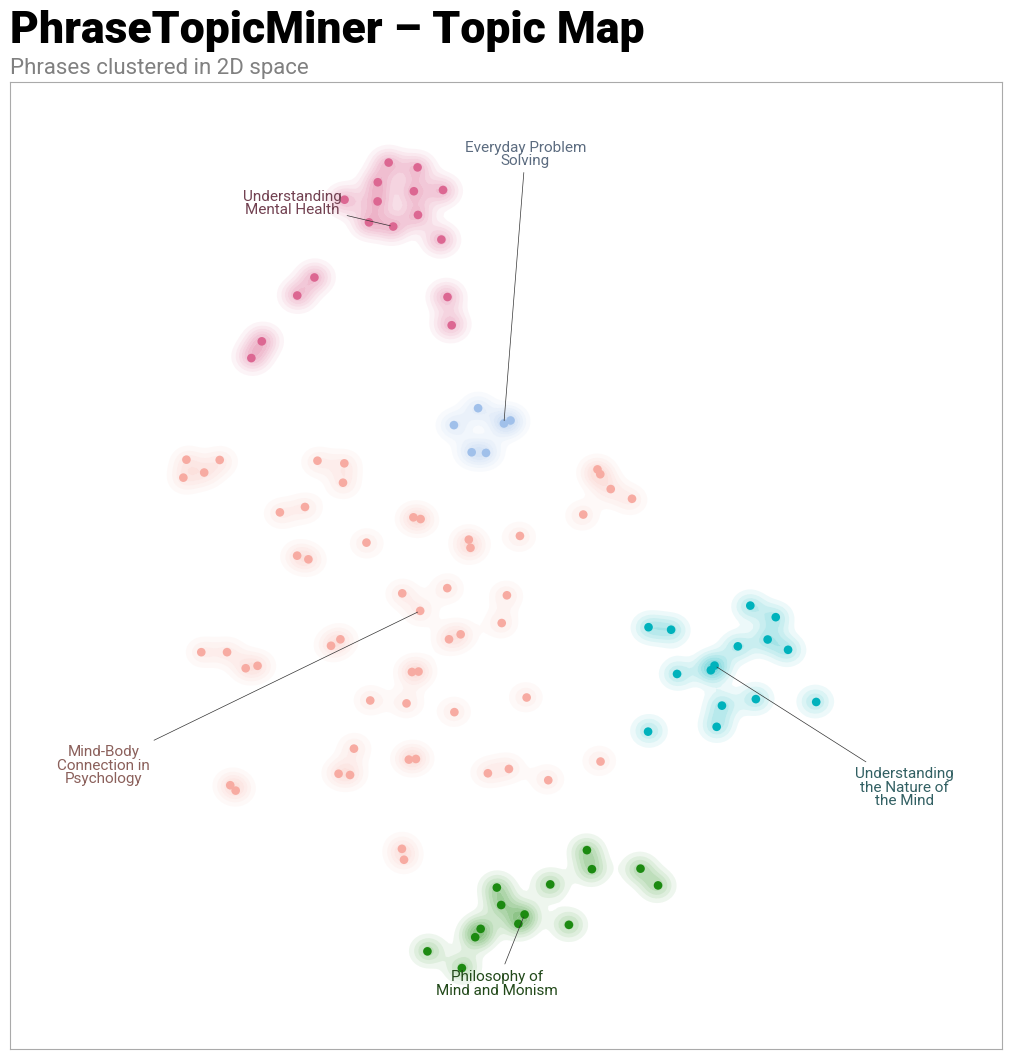

In [51]:
# Static PNG:
fig, ax = ptm.make_datamapplot_static(
    core,
    cluster_name_map=cluster_name_map,
    save_path="topic_map.png",
    label_font_size=11,
    use_medoids=True,
)

<InteractiveFigure width=100% height=800>
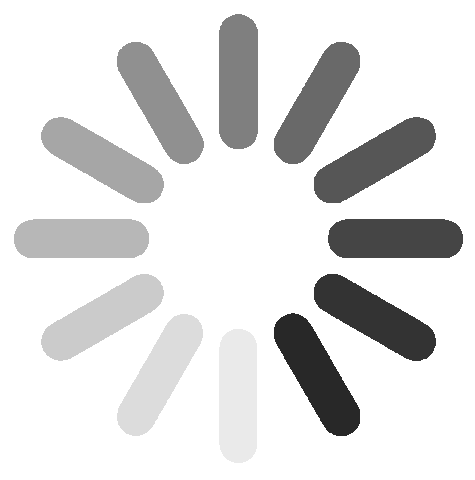

In [52]:
# Interactive topic map with highlighted sentences in the hover
fig_int = ptm.make_datamapplot_interactive(
    core,
    sentences_by_doc=sentences_by_doc,
    cluster_name_map=cluster_name_map,
    point_size=5,  
    save_html_path="phrase_topics.html",
)

# In Jupyter: `display(fig_int)`
display(fig_int)